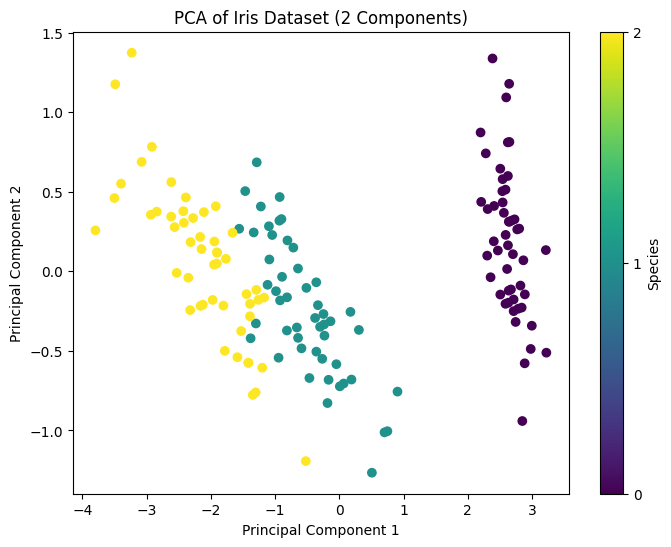

In [1]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

def pca(X, n_components):
    """
    Performs Principal Component Analysis (PCA).

    Args:
        X (numpy.ndarray): Input data matrix (n_samples, n_features).
        n_components (int): Number of principal components to retain.

    Returns:
        numpy.ndarray: Transformed data matrix (n_samples, n_components).
    """

    # 1. Center the data
    X_meaned = X - np.mean(X, axis=0)

    # 2. Compute the covariance matrix
    cov_mat = np.cov(X_meaned, rowvar=False)

    # 3. Compute eigenvalues and eigenvectors
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)

    # 4. Sort eigenvalues and eigenvectors in descending order
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvectors = eigen_vectors[:, sorted_index]

    # 5. Select the top n_components eigenvectors
    principal_components = sorted_eigenvectors[:, :n_components]

    # 6. Transform the data
    X_transformed = np.dot(X_meaned, principal_components)

    return X_transformed

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA to reduce dimensionality to 2 components
X_pca = pca(X, 2)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset (2 Components)')
plt.colorbar(ticks=np.unique(y), label='Species')
plt.show()

In [2]:
import pandas as pd

def find_s_algorithm():
    # Define the dataset directly instead of reading from a CSV file
    data = pd.DataFrame({
        'Sky': ['Sunny', 'Sunny', 'Cloudy', 'Rainy', 'Sunny'],
        'Temperature': ['Warm', 'Hot', 'Warm', 'Cold', 'Warm'],
        'Humidity': ['Normal', 'High', 'High', 'Normal', 'Normal'],
        'Wind': ['Strong', 'Weak', 'Strong', 'Strong', 'Weak'],
        'PlayTennis': ['Yes', 'No', 'Yes', 'No', 'Yes']  # Target column
    })

    print("Training data:")
    print(data)

    attributes = data.columns[:-1]  # All columns except the last one
    class_label = data.columns[-1]  # The last column is the target variable

    hypothesis = ['?' for _ in attributes]  # Initialize with the most general hypothesis

    for index, row in data.iterrows():
        if row[class_label] == 'Yes':  # Process only positive examples
            for i, value in enumerate(row[attributes]):
                if hypothesis[i] == '?' or hypothesis[i] == value:
                    hypothesis[i] = value  # Retain attribute value if it matches
                else:
                    hypothesis[i] = '?'  # Generalize otherwise

    return hypothesis


# Run the algorithm without worrying about file paths
hypothesis = find_s_algorithm()
print("\nThe final hypothesis is:", hypothesis)

Training data:
      Sky Temperature Humidity    Wind PlayTennis
0   Sunny        Warm   Normal  Strong        Yes
1   Sunny         Hot     High    Weak         No
2  Cloudy        Warm     High  Strong        Yes
3   Rainy        Cold   Normal  Strong         No
4   Sunny        Warm   Normal    Weak        Yes

The final hypothesis is: ['Sunny', 'Warm', 'Normal', '?']


Predictions for k=1: [1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 1. 2. 1. 1. 2. 2. 1.
 1. 1. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1. 1. 1. 2. 2. 1. 1. 1. 1. 2. 1. 2.
 2. 2.]


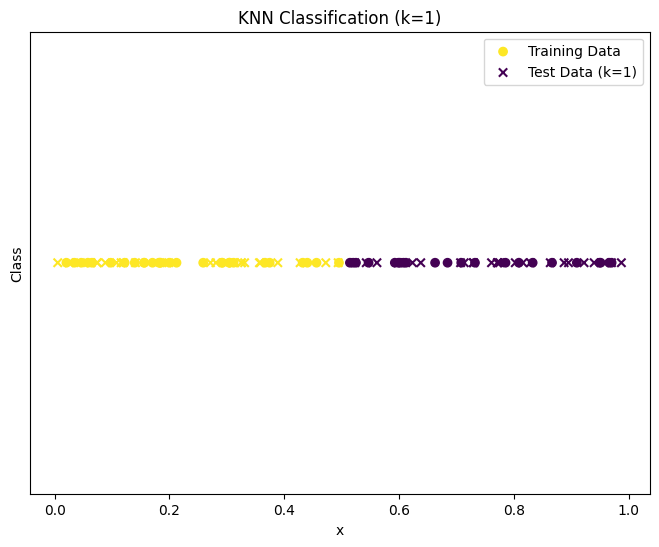

Predictions for k=2: [1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 1. 2. 1. 1. 2. 2. 1.
 1. 1. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 2.
 2. 2.]


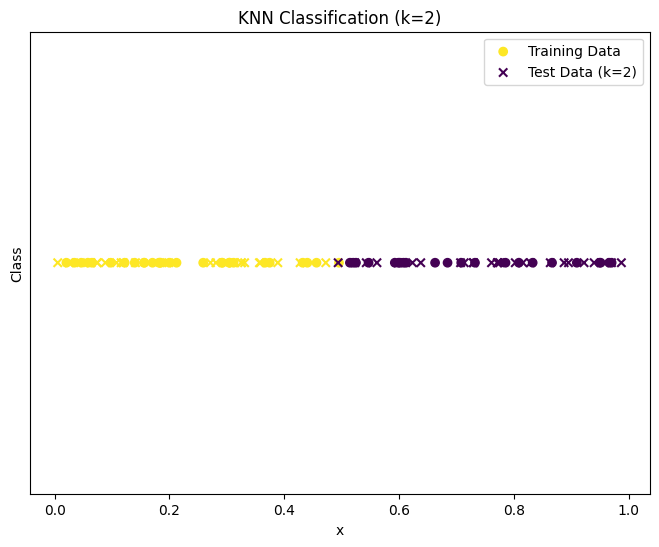

Predictions for k=3: [1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 1. 2. 1. 1. 2. 2. 1.
 1. 1. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 2.
 2. 2.]


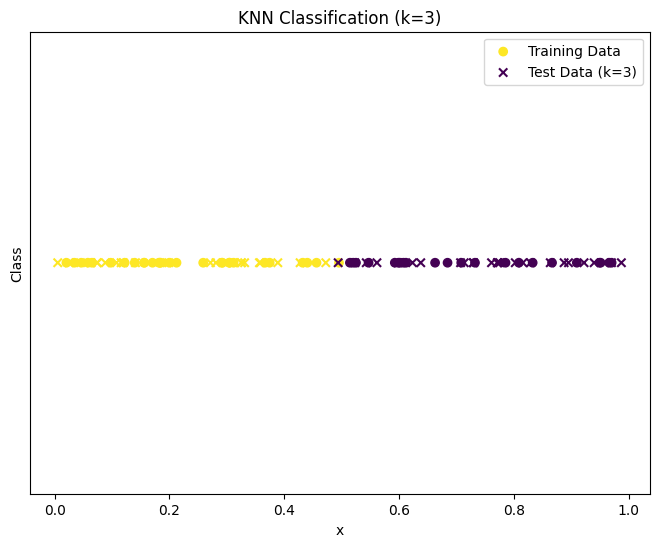

Predictions for k=4: [1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 1. 2. 1. 1. 2. 2. 1.
 1. 1. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 2.
 2. 2.]


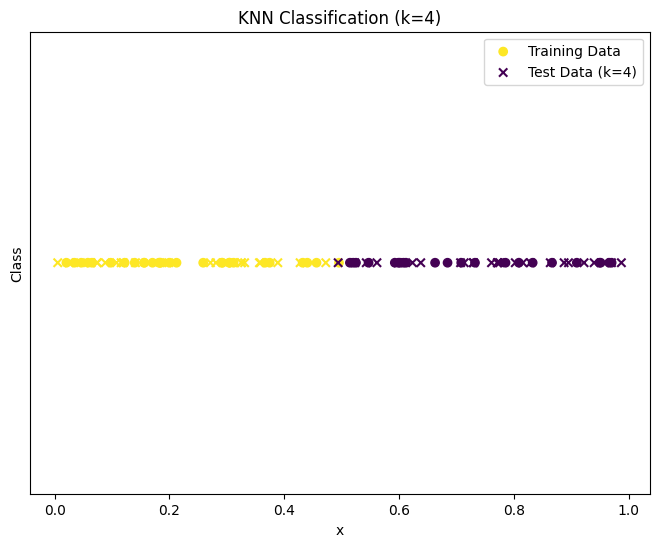

Predictions for k=5: [1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 1. 2. 1. 1. 2. 2. 1.
 1. 1. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 2.
 2. 2.]


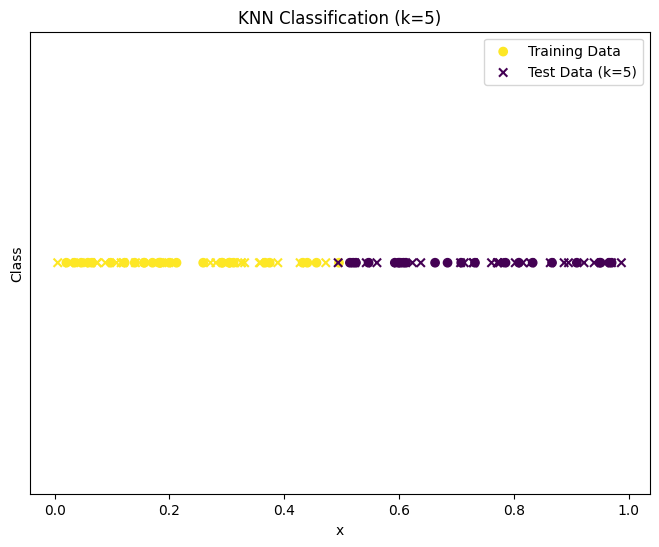

Predictions for k=20: [1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 1. 2. 1. 1. 2. 2. 1.
 1. 1. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 2.
 2. 2.]


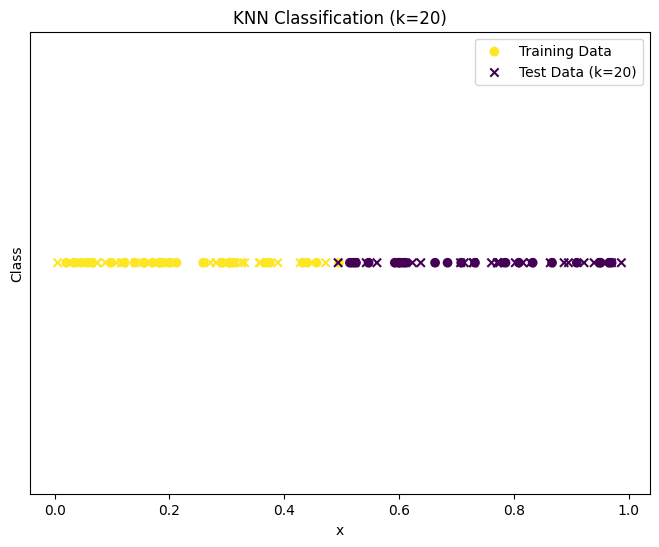

Predictions for k=30: [1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 1. 2. 1. 1. 2. 2. 1.
 1. 1. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1. 1. 1. 2. 2. 1. 1. 1. 1. 2. 1. 2.
 2. 2.]


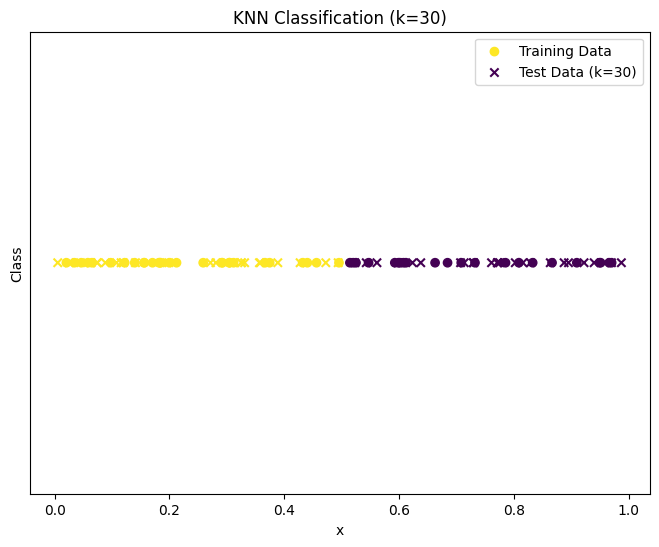

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def knn_classify(train_x, train_y, test_x, k):
    """
    Classifies test_x using k-Nearest Neighbors algorithm.

    Args:
        train_x: Training data features (1D array).
        train_y: Training data labels (1D array).
        test_x: Test data features (1D array).
        k: Number of neighbors to consider.

    Returns:
        Predicted labels for test_x (1D array).
    """

    predictions = []
    for test_point in test_x:
        distances = np.abs(train_x - test_point)  # Calculate absolute distances
        nearest_indices = np.argsort(distances)[:k]  # Find indices of k nearest neighbors
        nearest_labels = train_y[nearest_indices]

        # Determine the most frequent label among the k neighbors
        unique_labels, counts = np.unique(nearest_labels, return_counts=True)
        predicted_label = unique_labels[np.argmax(counts)]
        predictions.append(predicted_label)

    return np.array(predictions)

# Generate 100 random values in the range [0, 1]
np.random.seed(42)  # For reproducibility
x = np.random.rand(100)

# Label the first 50 points
y = np.zeros(100)
y[:50] = (x[:50] <= 0.5).astype(int) + 1 #Class 1 if <= 0.5, Class 2 otherwise
y[50:] = -1 # initialize test values to -1, they will be overriden by knn prediction

# Split data into training and test sets
train_x, train_y = x[:50], y[:50]
test_x = x[50:]

# Classify the remaining points using KNN for different values of k
k_values = [1, 2, 3, 4, 5, 20, 30]
predictions = {}

for k in k_values:
    predictions[k] = knn_classify(train_x, train_y, test_x, k)
    y[50:] = predictions[k]
    print(f"Predictions for k={k}: {predictions[k]}")

    # Plot the results for each k
    plt.figure(figsize=(8, 6))
    plt.scatter(train_x, np.zeros_like(train_x), c=train_y, marker='o', label='Training Data')
    plt.scatter(test_x, np.zeros_like(test_x), c=predictions[k], marker='x', label=f'Test Data (k={k})')
    plt.xlabel('x')
    plt.ylabel('Class')
    plt.title(f'KNN Classification (k={k})')
    plt.legend()
    plt.yticks([]) #remove y axis ticks
    plt.show()

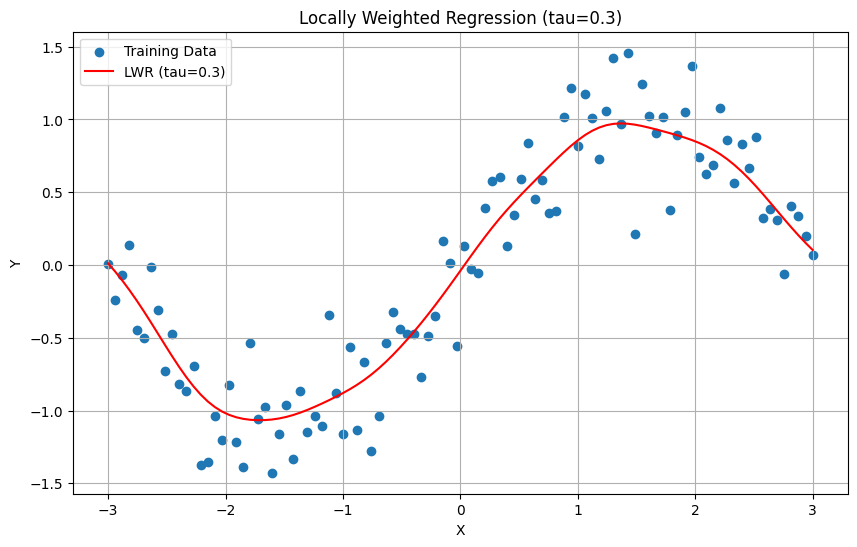

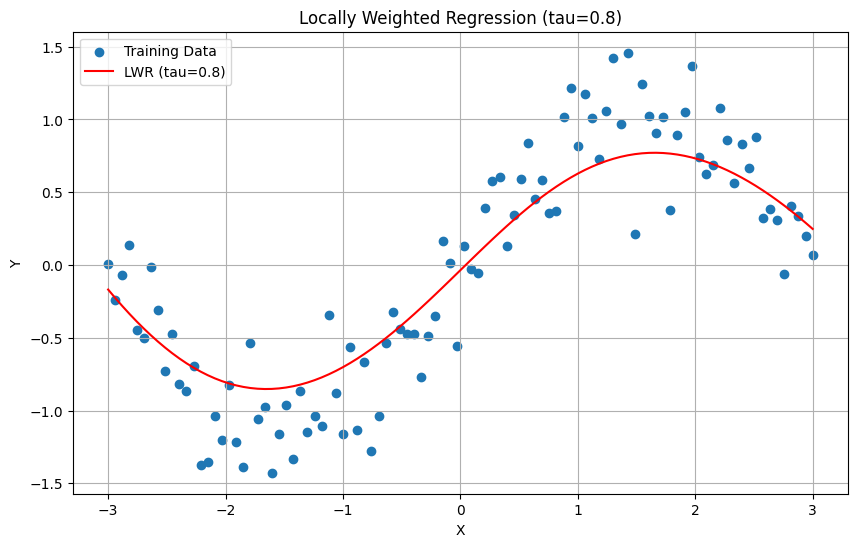

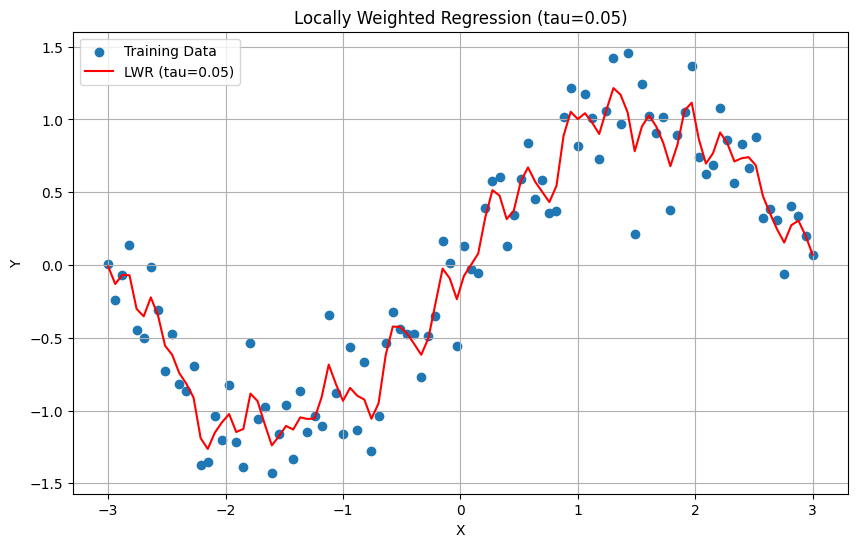

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def locally_weighted_regression(x, X, Y, tau):
    """
    Performs locally weighted regression.

    Args:
        x: The query point.
        X: The training data points (features).
        Y: The training data points (targets).
        tau: The bandwidth parameter.

    Returns:
        The predicted value at the query point.
    """
    # Fix: Calculate weights using broadcasting with the feature column (X[:, 1])
    weights = np.exp(-((x[1] - X[:, 1]) ** 2) / (2 * tau ** 2))  
    W = np.diag(weights)
    try:
        beta = np.linalg.pinv(X.T @ W @ X) @ X.T @ W @ Y
    except np.linalg.LinAlgError:
        print("Singular matrix encountered. Returning NaN")
        return np.nan

    return beta @ x

def generate_noisy_data(n=100):
    """Generates noisy sinusoidal data."""
    np.random.seed(42)  # For reproducibility
    X = np.linspace(-3, 3, n)
    Y = np.sin(X) + np.random.normal(0, 0.3, n)
    return X, Y

def plot_lwr(X, Y, tau):
    """Plots the locally weighted regression results."""
    x_test = np.linspace(min(X[:, 1]), max(X[:, 1]), 100) # Extract the second column (feature values)
    x_test = np.array([[1, x] for x in x_test])  # Add bias term
    y_pred = [locally_weighted_regression(x, X, Y, tau) for x in x_test]

    plt.figure(figsize=(10, 6))
    plt.scatter(X[:,1], Y, label="Training Data") # plotting the second column of X as features
    plt.plot(x_test[:,1], y_pred, color="red", label=f"LWR (tau={tau})") # plotting the second column of x_test as features
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Locally Weighted Regression (tau={tau})")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example Usage
X, Y = generate_noisy_data()
X = np.array([[1, x] for x in X]) #adding bias term to feature matrix

# Test with different tau values
plot_lwr(X, Y, tau=0.3)
plot_lwr(X, Y, tau=0.8)
plot_lwr(X,Y, tau=0.05)